<a href="https://colab.research.google.com/github/hopekistulinec/DS1002/blob/main/Feb19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

array([[[ 18,  36, 160],
        [  7,  25, 149],
        [  8,  26, 150],
        ...,
        [  6,  24, 132],
        [  6,  24, 132],
        [  6,  24, 132]],

       [[ 13,  31, 155],
        [  2,  20, 144],
        [  2,  20, 144],
        ...,
        [  3,  21, 129],
        [  3,  21, 129],
        [  3,  21, 129]],

       [[ 10,  28, 152],
        [  0,  17, 141],
        [  0,  18, 142],
        ...,
        [  1,  19, 127],
        [  1,  19, 127],
        [  1,  19, 127]],

       ...,

       [[159, 142, 122],
        [194, 179, 160],
        [244, 234, 222],
        ...,
        [ 17,  25,  38],
        [ 16,  26,  36],
        [ 14,  24,  34]],

       [[174, 157, 139],
        [221, 208, 191],
        [254, 246, 235],
        ...,
        [ 15,  23,  36],
        [ 13,  23,  33],
        [ 10,  20,  30]],

       [[196, 180, 164],
        [240, 226, 213],
        [250, 242, 231],
        ...,
        [ 14,  22,  35],
        [ 12,  20,  31],
        [  8,  16,  27]]], dtype=uint8)
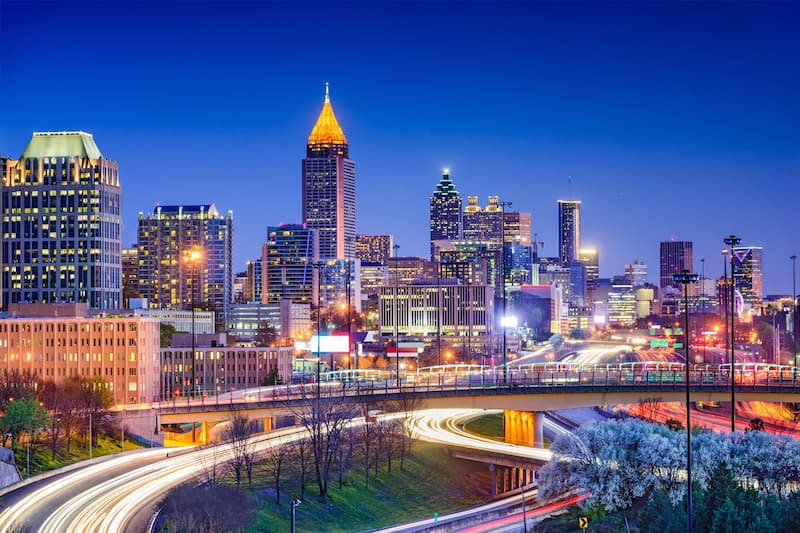

In [18]:
image

In [24]:
from skimage import io
photo = io.imread('/content/IMG_6288.jpg')
type(photo)

numpy.ndarray

In [25]:
photo.shape
photo[1,1,:]

array([211, 181, 147], dtype=uint8)

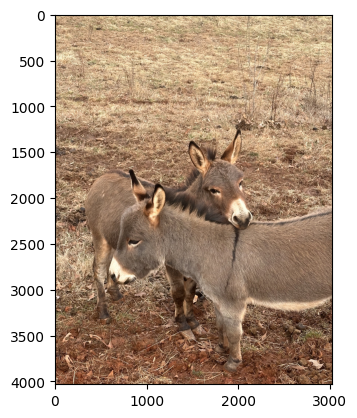

In [26]:
import matplotlib.pyplot as plt
plt.imshow(photo)

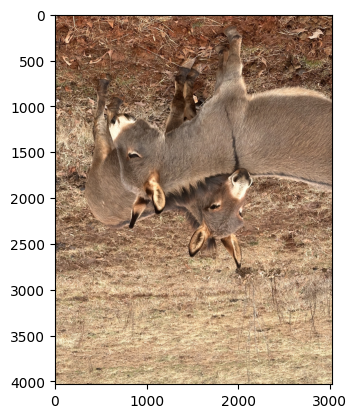

In [27]:
plt.imshow(photo[::-1])

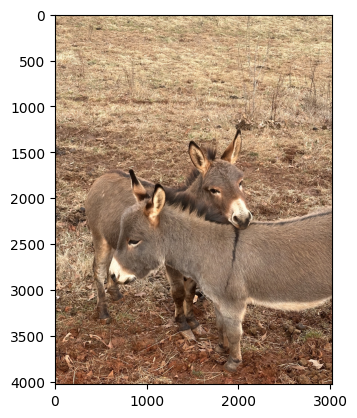

In [32]:
plt.imshow(photo[2::])

In [34]:
photo[211:0:]

array([], shape=(0, 3024, 3), dtype=uint8)

In [43]:
import numpy as np
from PIL import Image
import requests
import matplotlib.pyplot as plt

def bluefilter(image):
  bluefilterimage = np.copy(image)
  bluefilterimage[:,:,1:] = 0
  return bluefilterimage

def greenfilter(image):
  greenfilterimage = np.copy(image)
  greenfilterimage[:,:,1:] = 0
  return greenfilterimage

def redfilter(image):
  redfilterimage = np.copy(image)
  redfilterimage[:,:,1:] = 0
  return redfilterimage

URL = input("Please enter the link address for a jpg file")

response = requests.get(URL)
photo = Image.open(BytesIO(response.content))
image = np.array(image)

apply_bluefilter = bluefilter(image)
apply_greenfilter = greenfilter(image)
appy_redfilter = redfilter(image)





Please enter the link address for a jpg filehttps:///content/IMG_6288.jpg


InvalidURL: Invalid URL 'https:///content/IMG_6288.jpg': No host supplied

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def red_filter(photo):
    red_filtered_photo = np.copy(photo)
    red_filtered_photo[:,:,1:] = 0
    return red_filtered_photo

def green_filter(photo):
    green_filtered_photo = np.copy(photo)
    green_filtered_photo[:,:,[0,2]] = 0
    return green_filtered_photo

def blue_filter(photo):
    blue_filtered_photo = np.copy(photo)
    blue_filtered_photo[:,:,:2] = 0
    return blue_filtered_photo

url = input("Enter the URL of the .jpg file: ")

response = requests.get(url)
img = Image.open(BytesIO(response.content))

photo = np.array(img)

red_filtered = red_filter(photo)
green_filtered = green_filter(photo)
blue_filtered = blue_filter(photo)

rgonly = np.copy(photo)
rgonly[:,:,2] = 0

rb_no_green = np.copy(photo)
rb_no_green[:,:,1] = 0

gb_no_red = np.copy(photo)
gb_no_red[:,:,0] = 0

plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.imshow(photo)
plt.title('Original Image')

plt.subplot(2, 4, 2)
plt.imshow(red_filtered)
plt.title('Red Filtered')

plt.subplot(2, 4, 3)
plt.imshow(green_filtered)
plt.title('Green Filtered')

plt.subplot(2, 4, 4)
plt.imshow(blue_filtered)
plt.title('Blue Filtered')

plt.subplot(2, 4, 5)
plt.imshow(rg_no_blue)
plt.title('R and G, No Blue')

plt.subplot(2, 4, 6)
plt.imshow(rb_no_green)
plt.title('R and B, No Green')

plt.subplot(2, 4, 7)
plt.imshow(gb_no_red)
plt.title('G and B, No Red')

plt.show()

reconstructed_image = red_filtered + green_filtered + blue_filtered
if np.array_equal(photo, reconstructed_image):
    print("Original image is identical to the reconstructed image.")
else:
    print("Original image is not identical to the reconstructed image.")